In [1]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Summary Statistics

Summary statistics are the numbers that summarize properties of the data. Summarized properties include frequency, location, and spread. Most summary statistics can be calculated in a single pass through the data. There are multiple ways to obtain summary statistics for your data in Python. Below, we will demonstrate how to do so using pandas and NumPy. First, we import both of these libraries:

In [2]:
import pandas as pd
import numpy as np

Next, we generate two illustrative datasets from which we can generate summary statistics:

In [3]:
# Defines an n-dimensional array (ndarray) with 10,000 random numbers in the range [0-500).
values1 = np.random.randint(500, size=10000) 

# Defines a pandas Series similar to the above ndarray.
values2 = pd.Series(np.random.randint(500, size=10000)) 

pandas series are implemented as labeled ndarrays, and hence all statistical methods available for ndarrays can be used with this data structure as well. Below, see the first 10 elements generated for each list of values (note the explicit indexing displayed in the pandas series):

In [4]:
values1[:10]

array([134, 135, 135, 100,  71,  28, 149, 483, 408, 412])

In [5]:
values2[-10:]

9990    260
9991     37
9992    302
9993    152
9994    452
9995    481
9996    138
9997    277
9998    245
9999    481
dtype: int64

Built-in methods are available for all basic statistics. Some are demonstrated below:

In [6]:
print ('MIN(values1) = ' + str(values1.min()) + '\t\t\tMIN(values2) = ' + str(values2.min())) # minimum value in the list
print ('MAX(values1) = ' + str(values1.max()) + '\t\t\tMAX(values2) = ' + str(values2.max())) # maximum value
print ('RANGE(values1) = ' + str(values1.ptp()) + '\t\t\tRANGE(values2) = ' + str(np.ptp(values2))) # the range of the values
print ('MEAN(values1) = ' + str(values1.mean()) + '\t\tMEAN(values2) = ' + str(values2.mean())) # the mean of the values
print ('STD(values1) = ' + str(values1.std()) + '\tSTD(values2) = ' + str(values2.std())) # the standard deviation of the values
print ('VARIANCE(values1) = ' + str(values1.var()) + '\tVARIANCE(values2) = ' + str(values2.var())) # the variance of 

MIN(values1) = 0			MIN(values2) = 0
MAX(values1) = 499			MAX(values2) = 499
RANGE(values1) = 499			RANGE(values2) = 499
MEAN(values1) = 249.9142		MEAN(values2) = 249.0788
STD(values1) = 143.8503529309539	STD(values2) = 143.88883831047832
VARIANCE(values1) = 20692.92403836	VARIANCE(values2) = 20703.997790338977


Additionally, pandas series have a method called *describe()* that returns a nice summary of these basic statistics.

In [7]:
values2.describe()

count    10000.000000
mean       249.078800
std        143.888838
min          0.000000
25%        126.000000
50%        249.000000
75%        374.000000
max        499.000000
dtype: float64

For non-numerical series objects, *describe()* will return a simple summary of the number of unique values and most frequently occurring ones.

In [8]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])

In [9]:
s

0      a
1      a
2      b
3      b
4      a
5      a
6    NaN
7      c
8      d
9      a
dtype: object

In [10]:
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

*np.nan* is used to denote missing values. By default, the statistical methods implemented in pandas skip these values, which is not always the case when we are dealing with ndarrays. This behavior can be altered by including the *skipna=False* flag when calling a method.

## Handling missing data with pandas

pandas has great support for missing data. For full documentation, [check this page](http://pandas-docs.github.io/pandas-docs-travis/user_guide/missing_data.html). Below are a few examples of how to work with missing data using pandas. First, we create a pandas DataFrame with 5 rows and 3 columns and fill it with random numbers:

In [11]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])

In [12]:
df

,one,two,three
a,-0.051824,-0.992564,0.403146
c,1.506075,-1.031040,-0.664134
e,-0.116004,0.360749,1.338887
f,-0.225087,-2.010183,-0.363459
h,1.832936,0.036566,1.164027


Next, we add two more columns, named 'four' and 'five':

In [13]:
df['four'] = 'bar'
df['five'] = df['one'] > 0

In [14]:
df

,one,two,three,four,five
a,-0.051824,-0.992564,0.403146,bar,False
c,1.506075,-1.031040,-0.664134,bar,True
e,-0.116004,0.360749,1.338887,bar,False
f,-0.225087,-2.010183,-0.363459,bar,False
h,1.832936,0.036566,1.164027,bar,True


Adding new rows is also simple. Below we include three extra empty rows:

In [15]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,-0.051824,-0.992564,0.403146,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,1.506075,-1.031040,-0.664134,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-0.116004,0.360749,1.338887,bar,False
f,-0.225087,-2.010183,-0.363459,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,1.832936,0.036566,1.164027,bar,True


In [16]:
#This is one way to index a column in pandas
df2['one']

a   -0.051824
b         NaN
c    1.506075
d         NaN
e   -0.116004
f   -0.225087
g         NaN
h    1.832936
Name: one, dtype: float64

In [17]:
#This is one way to index a row in pandas
df2.loc['a']

one     -0.0518238
two      -0.992564
three     0.403146
four           bar
five         False
Name: a, dtype: object

pandas has two functions *isnull()* and *notnull()* that return boolean objects when called.

In [18]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [19]:
pd.notnull(df2['one'])

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

Missing values propagate naturally through arithmetic operations between pandas objects.

In [20]:
a = df[['one','two']]
a.loc[['a','c'],'one'] = float('nan')
a

,one,two
a,NaN,-0.992564
c,NaN,-1.031040
e,-0.116004,0.360749
f,-0.225087,-2.010183
h,1.832936,0.036566


In [21]:
b = df[['one','two']]
b

,one,two
a,-0.051824,-0.992564
c,1.506075,-1.031040
e,-0.116004,0.360749
f,-0.225087,-2.010183
h,1.832936,0.036566


In [22]:
a * b

,one,two
a,NaN,0.985183
c,NaN,1.063043
e,0.013457,0.130140
f,0.050664,4.040834
h,3.359653,0.001337


In [23]:
a['one'].dropna()

e   -0.116004
f   -0.225087
h    1.832936
Name: one, dtype: float64

In pandas, summary statistics all account for missing values. 

*   When summing data, NA (missing) values will be treated as zero
*   If the data are all NA, the result will be NA
*   Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

In [24]:
a

,one,two
a,NaN,-0.992564
c,NaN,-1.031040
e,-0.116004,0.360749
f,-0.225087,-2.010183
h,1.832936,0.036566


In [25]:
a['one'].sum()

1.4918447880937886

In [26]:
a.mean(1)

a   -0.992564
c   -1.031040
e    0.122373
f   -1.117635
h    0.934751
dtype: float64

*This is just the bare minimum. pandas has a lot more missing data functionality.*

## Histograms

#### Using pandas

Plotting histograms using pandas is quite straightforward. Using the above *values2* series, we can simply call the *hist()* method.

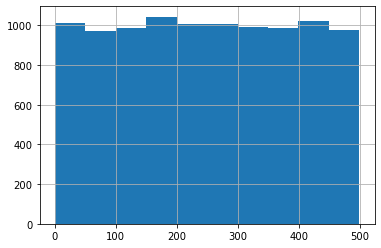

In [27]:
pdhist = values2.hist()

Parameters can be used to change the number of bins, color, transparency, etc.

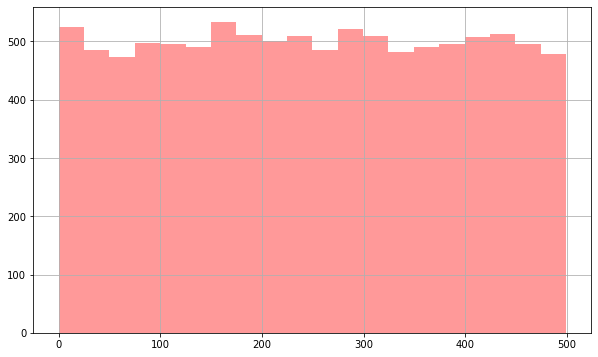

In [28]:
pdhist2 = values2.hist(bins=20, color='r',alpha=0.4, figsize=(10,6))

#### Using NumPy + matplotlib

While the pandas data structure has a method that automatically wraps around a call to the *hist()* method of the plotting library Matplotlib, we can achieve the same result by performing that call manually on our *values1* ndarray.

In [29]:
import matplotlib.pyplot as plt # Required for plotting

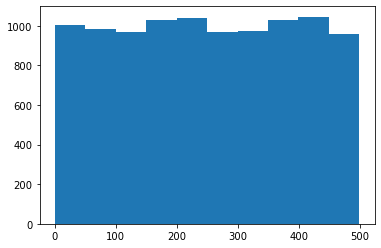

In [30]:
nphist = plt.hist(values1)

## Boxplots

#### Using pandas

pandas DataFrames have a boxplot method that allows you to visualize the distribution of values within each column.

In [31]:
df = pd.DataFrame(rand(10,2), columns=['Col1', 'Col2'] )

In [32]:
df.head()

,Col1,Col2
0,0.450760,0.400600
1,0.913625,0.867748
2,0.794759,0.874856
3,0.853519,0.166195
4,0.616301,0.910709


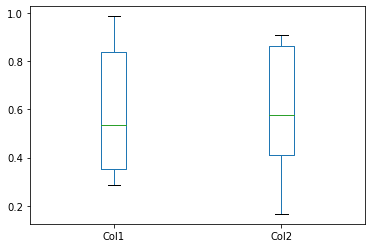

In [33]:
box = df.boxplot(grid=False, return_type='axes')

#### Using NumPy + matplotlib

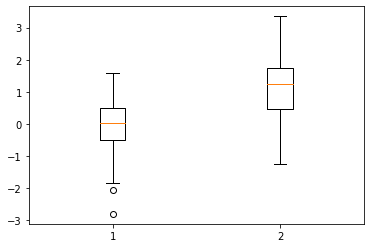

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

x1 = np.random.normal(0,1,50)
x2 = np.random.normal(1,1,50)

npbox = ax.boxplot([x1,x2])

## Scatterplots

#### Using pandas

Let's define a dataframe containing 2 columns, each with 200 random numbers < 1.

In [35]:
df = pd.DataFrame(rand(200,2))

In [36]:
df.head()

,0,1
0,0.746703,0.332898
1,0.468047,0.128916
2,0.869135,0.892921
3,0.553117,0.816849
4,0.012144,0.541302


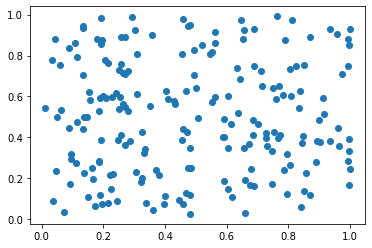

In [37]:
pdscatter = plt.scatter(df[0], df[1])

#### Using NumPy + matplotlib

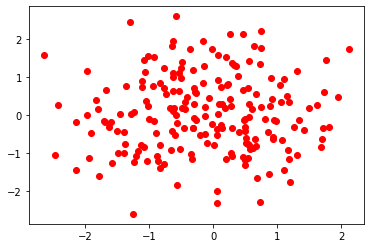

In [38]:
x = np.random.randn(200)
y = np.random.randn(200)

fig = plt.figure()
ax = fig.add_subplot(111)

npscatter = ax.scatter(x,y,color='r')

# Assignment 2 - Isidora Conic

## Everything below this point are answers to the assignment questions.

### 1. Iris Dataset

**1.1** SUMMARY STATISTICS

Importing pandas library and loading the Iris dataset into a dataframe (code provided from assignment handout).

In [228]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" 
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
                                                "Petal Length", "Petal Width",
                                                "Name"])

(a) *Print the first 5 elements of your DataFrame using the command head(). How many features are there and what are their types (e.g., numeric, nominal)?*

In [230]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


There are 4 feautures:
1. **Sepal Length**: Numeric (ordinal)
2. **Sepal Width**: Numeric (ordinal)
3. **Petal Length**: Numeric (ordinal)
4. **Petal Width**: Numeric (ordinal)

(b) *Compute and display summary statistics for each numeric feature available in the dataset. These must include the minimum value, maximum value, mean, standard deviation, count, and 25:50:75% percentiles.*

**Sepal Length summary statistics**

In [231]:
sepal_length_stats = df["Sepal Length"].describe()
sepal_length_stats

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal Length, dtype: float64

**Sepal Width summary statistics**

In [232]:
sepal_width_stats = df["Sepal Width"].describe()
sepal_width_stats

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: Sepal Width, dtype: float64

**Petal Length summary statistics**

In [233]:
petal_length_stats = df["Petal Length"].describe()
petal_length_stats

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: Petal Length, dtype: float64

**Petal Width summary statistics**

In [234]:
petal_width_stats = df["Petal Width"].describe()
petal_width_stats

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: Petal Width, dtype: float64

**NOTE:** All of the summary statistics above can be seen in one table, together:

In [235]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**1.2** DATA VISUALIZATION

**Histograms:** To illustrate the feature distributions, create a histogram for each numeric fea- ture in the dataset. You may plot each histogram individually or combine them all into a single plot. When generating histograms for this assignment, use the default number of bins. Recall that a histogram provides a graphical representation of the distribution of the data.

Import seaborn:

In [236]:
import seaborn as sns

**Sepal Length histogram**

Text(0.5, 1.0, 'Sepal Length Frequencies')

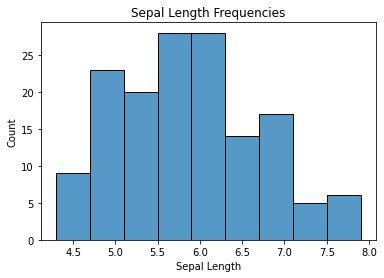

In [237]:
sns.histplot(df["Sepal Length"]).set_title("Sepal Length Frequencies")

**Sepal Width histogram**

Text(0.5, 1.0, 'Sepal Width Frequencies')

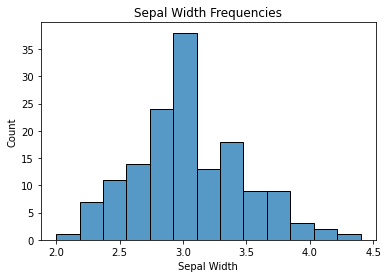

In [238]:
sns.histplot(df["Sepal Width"]).set_title("Sepal Width Frequencies")

**Petal Length histogram**

Text(0.5, 1.0, 'Petal Length Frequencies')

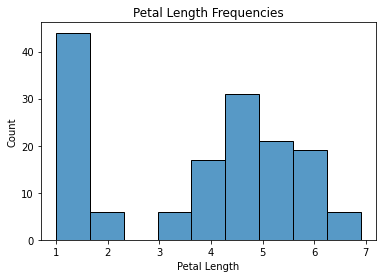

In [239]:
sns.histplot(df["Petal Length"]).set_title("Petal Length Frequencies")

**Petal Width histogram**

Text(0.5, 1.0, 'Petal Width Frequencies')

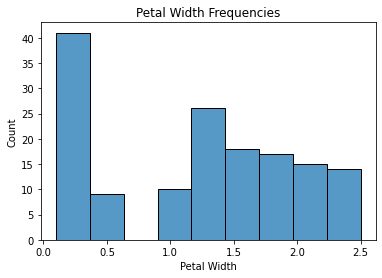

In [240]:
sns.histplot(df["Petal Width"]).set_title("Petal Width Frequencies")

**Box Plots:** To further assess the data, create a box plot for each numeric feature in the dataset. All of the box plots will be combined into a single plot. Recall that a box plot provides a graphical representation of the location and variation of the data through their quartiles; they are especially useful for comparing distributions and identifying outliers.

**Sepal Length boxplot**

Text(0.5, 1.0, 'Sepal Length Distribution')

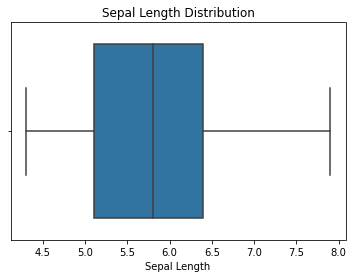

In [241]:
sns.boxplot(x=df["Sepal Length"]).set_title("Sepal Length Distribution")

**Sepal Width boxplot**

Text(0.5, 1.0, 'Sepal Width Distribution')

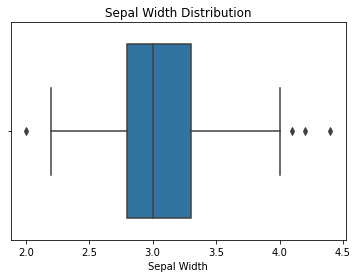

In [242]:
sns.boxplot(x=df["Sepal Width"]).set_title("Sepal Width Distribution")

**Petal Length boxplot**

Text(0.5, 1.0, 'Petal Length Distribution')

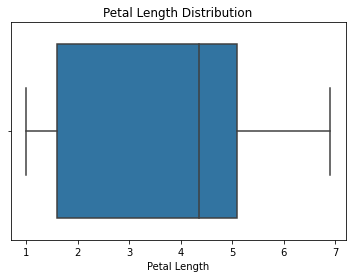

In [243]:
sns.boxplot(x=df["Petal Length"]).set_title("Petal Length Distribution")

**Petal Width boxplot**

Text(0.5, 1.0, 'Petal Width Distribution')

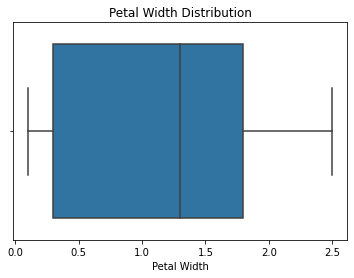

In [244]:
sns.boxplot(x=df["Petal Width"]).set_title("Petal Width Distribution")

**All features boxplot**

In [245]:
#Remove the 'Name' column and "melt" the columns together.
df_no_name = df.drop(columns=["Name"])
df_no_name = pd.melt(df_no_name)

[Text(0.5, 0, 'Numeric Feature'), Text(0, 0.5, 'Value')]

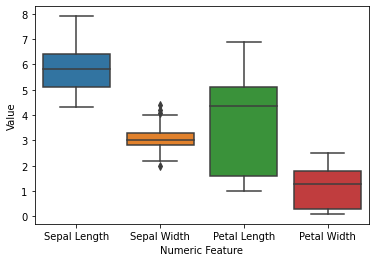

In [246]:
all_boxplot = sns.boxplot(x="variable", y="value", data=df_no_name)
all_boxplot.set(xlabel="Numeric Feature", ylabel="Value")

### 2. Ames, Iowa Housing Dataset

Loading the Ames, Iowa Housing dataset into a dataframe (code provided from assignment handout).

In [252]:
pd.set_option("display.max_columns", 100)
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/AmesHousing.txt" 
df = pd.read_csv(url, sep="\t")
original_df = df.copy()
original_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**2.1** IMPUTATION

*Identify and impute the features with missing values:*

(a) *How many features have missing values?*

In [253]:
#List of columns that have more than 0 null (na) values
#Note that "Order" and "PID" are NOT features
#Also, "SalePrice" is not a feature (it is the value we are trying to estimate)
#We drop all those columns
df = df.drop(columns=["Order", "PID", "SalePrice"])
na_columns = df.columns[df.isnull().sum() > 0]
print("There are ", na_columns.size, " features with missing values.")

There are  27  features with missing values.


In [254]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


(b) *Fill each missing nominal feature value with the string “Missing”.*

In [255]:
#Get list of numeric feature columns
#Idea from: https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical/29803290#29803290
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

In [256]:
#Get list of nominal feature columns
#Idea from: https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical/29803290#29803290
cols = df.columns.tolist()
nominal_cols = list(set(cols)-set(numeric_cols))

In [257]:
#Only fill the nominal columns with "Missing" (i.e. non-numeric in this case)
df[nominal_cols] = df[nominal_cols].fillna("Missing")
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,141.0,31770,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal
1,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
2,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
3,20,RL,93.0,11160,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal
4,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal


(c) *Interpolate each missing numeric feature value using linear interpolation.*

In [258]:
df[numeric_cols] = df[numeric_cols].interpolate()
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,141.0,31770,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal
1,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
2,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
3,20,RL,93.0,11160,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal
4,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal


In [259]:
#Making a copy of the imputed data set to use for visualization comparison later
df_imputed = df.copy()
df_imputed.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,141.0,31770,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal
1,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
2,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
3,20,RL,93.0,11160,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal
4,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal


**2.2** STANDARDIZATION

In [260]:
from sklearn.preprocessing import StandardScaler

(a) *Standardize the imputed feature data so that the values of each numeric feature are standard normally distributed (i.e., each feature is Gaussian with zero mean and unit variance).*

In [261]:
#Again, we will be using the numeric columns list from above (numeric_cols)
#Idea from: https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num
ss = StandardScaler()
df_std = df.copy()
df_std[numeric_cols] = ss.fit_transform(df[numeric_cols])
df_std.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,-0.877005,RL,3.128744,2.744381,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,-0.067254,-0.506718,-0.375537,-1.163488,Hip,CompShg,BrkFace,Plywood,Stone,0.056729,TA,TA,CBlock,TA,Gd,Gd,BLQ,0.431399,Unf,-0.293918,-0.269181,0.064758,GasA,Fa,Y,SBrkr,1.267003,-0.783185,-0.101005,0.309265,1.082555,-0.249782,-1.024793,-0.755203,0.176094,-0.207291,TA,0.354167,Typ,2.162180,Gd,Attchd,-0.670221,Fin,0.30699,0.257066,TA,TA,P,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,Missing,Missing,Missing,-0.089422,-0.448057,1.678499,WD,Normal
1,-0.877005,RH,0.459721,0.187097,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,-0.776079,0.393091,-0.342468,-1.115542,Gable,CompShg,VinylSd,VinylSd,None,-0.570422,TA,TA,CBlock,TA,TA,No,Rec,0.055976,LwQ,0.557582,-0.658397,-0.384699,GasA,TA,Y,SBrkr,-0.672643,-0.783185,-0.101005,-1.194427,-0.822482,-0.249782,-1.024793,-0.755203,-1.032234,-0.207291,TA,-0.917535,Typ,-0.925143,Missing,Attchd,-0.631305,Unf,-1.00804,1.196425,TA,TA,Y,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,Missing,MnPrv,Missing,-0.089422,-0.079602,1.678499,WD,Normal
2,-0.877005,RL,0.503475,0.522814,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,-0.067254,0.393091,-0.441674,-1.259380,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.034330,TA,TA,CBlock,TA,TA,No,ALQ,1.054908,Unf,-0.293918,-0.348845,0.629983,GasA,TA,Y,SBrkr,0.432445,-0.783185,-0.101005,-0.337718,-0.822482,-0.249782,-1.024793,1.234675,0.176094,-0.207291,Gd,-0.281684,Typ,-0.925143,Missing,Attchd,-0.748052,Unf,-1.00804,-0.747397,TA,TA,Y,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,Missing,Missing,Gar2,21.985725,-0.079602,1.678499,WD,Normal
3,-0.877005,RL,1.028529,0.128458,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,0.641571,-0.506718,-0.110988,-0.779919,Hip,CompShg,BrkFace,BrkFace,None,-0.570422,Gd,TA,CBlock,TA,TA,No,ALQ,1.366663,Unf,-0.293918,1.105596,2.402840,GasA,Ex,Y,SBrkr,2.425687,-0.783185,-0.101005,1.207523,1.082555,-0.249782,0.784028,1.234675,0.176094,-0.207291,Ex,0.990018,Typ,2.162180,TA,Attchd,-0.358895,Fin,0.30699,0.229164,TA,TA,Y,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,Missing,Missing,Missing,-0.089422,-0.816513,1.678499,WD,Normal
4,0.061285,RL,0.197194,0.467348,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,-0.776079,-0.506718,0.848000,0.658466,Gable,CompShg,VinylSd,VinylSd,None,-0.570422,TA,TA,PConc,Gd,TA,No,GLQ,0.765108,Unf,-0.293918,-0.961121,-0.280280,GasA,Gd,Y,SBrkr,-0.590974,0.853432,-0.101005,0.255844,-0.822482,-0.249782,0.784028,1.234675,0.176094,-0.207291,TA,-0.281684,Typ,0.618518,TA,Attchd,0.769662,Fin,0.30699,0.043152,TA,TA,Y,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,Missing,MnPrv,Missing,-0.089422,-1.184969,1.678499,WD,Normal


(b) *Visualize the results using box plots. How do the plots differ from box plots made before feature standardization? Which feature has the outlier furthest from the mean before and after standardization?*

**Boxplots of numeric features BEFORE standardization:**

In [262]:
#Similar approach to the iris dataset
#Remove the nominal feature columns column and "melt" the numeric feature columns together.
df_num_imputed = df_imputed.drop(columns=nominal_cols) 
df_num_imputed.reset_index(drop=True, inplace=True)
df_num_imputed = pd.melt(df_num_imputed)

In [263]:
#Setting the plot dimensions
#From: https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python
fig_dims = (100, 200)
fig, ax = plt.subplots(figsize=fig_dims)
#Making the boxplot and increasing font size of axis labels
pre_stand_boxplot = sns.boxplot(x="variable", y="value", ax=ax, data=df_num_imputed)
pre_stand_boxplot.set_xlabel("Numeric Feature",fontsize=50)
pre_stand_boxplot.set_ylabel("Value",fontsize=50)
pre_stand_boxplot.tick_params(labelsize=20)

**Boxplots of numeric features AFTER standardization:**

In [266]:
#Similar approach to the iris dataset
#Remove the nominal feature columns column and "melt" the columns together.
df_num_stand = df_std.drop(columns=nominal_cols)
df_num_stand = pd.melt(df_num_stand)

In [267]:
#Setting the plot dimensions
#From: https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python
fig_dims = (100, 200)
fig, ax = plt.subplots(figsize=fig_dims)
#Making the boxplot and increasing font size of axis labels
post_stand_boxplot = sns.boxplot(x="variable", y="value", ax=ax, data=df_num_stand)
post_stand_boxplot.set_xlabel("Numeric Feature",fontsize=50)
post_stand_boxplot.set_ylabel("Value",fontsize=50)
post_stand_boxplot.tick_params(labelsize=20)

*How do the plots differ from box plots made before feature standardization?*

The plots after standardization all have a median that is very close to 0 (and mean equal to 0), which we can see by the middle line of every one of the feature plots being at or around 0. Further, the spread of the feature values after standardization between the features is very similar. In the non-standardized plots, the spread of the data could be very small or very large between features.

*Which feature has the outlier furthest from the mean before and after standardization?*

Before standardization, 'Lot Area' had outliers furthest from the mean. After standardization, 'Misc Val' has an outlier furthest from the mean.

**2.3** FEATURE SELECTION

Using the standardized feature data, select the top numeric features:

(a) *To get an idea of their relative importance, estimate the mutual information between the numeric features and the class column, ‘SalePrice’.*

In [268]:
#Importing the relevant library
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

**Note:** We are using the standardized data for feature selection.

In [269]:
X = df_std.drop(columns=nominal_cols)
y = original_df.iloc[:,-1]

In [270]:
mi = mutual_info_regression(X, y)
print(mi)

[0.29440853 0.21620464 0.1672664  0.58486124 0.14358418 0.40194278
 0.3015677  0.16806092 0.18763374 0.0021211  0.11904529 0.39415325
 0.36920659 0.21171719 0.00394249 0.49676149 0.03926639 0.01198517
 0.26241569 0.05864916 0.05419149 0.02050568 0.18764073 0.16892297
 0.30933978 0.39642033 0.41502822 0.11342212 0.18394954 0.04527003
 0.         0.01421714 0.00392606 0.01163414 0.         0.02348109]


(b) *What are the top 5 numeric features ranked by mutual information? Note that features with a higher estimated mutual information are considered more informative.*

In [271]:
#From Prof. Aguiar's 'Data Preprocessing' notebook: https://github.ccs.neu.edu/eaguiar/CS6220_Spring2021/blob/master/Week%2003%20-%20Data%20Preprocessing.ipynb
#Select the 5 best features.
selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(X, y)

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7ff673375820>)

In [272]:
# Get indices of columns to keep.
idxs_selected = selector.get_support(indices=True)

In [273]:
# Create new DataFrame with only desired columns.
X_new = X.iloc[:, idxs_selected]

In [274]:
# Show the top 5 features.
print(X_new.head())

   Overall Qual  Year Built  Total Bsmt SF  Gr Liv Area  Garage Area
0     -0.067254   -0.375537       0.064758     0.309265     0.257066
1     -0.776079   -0.342468      -0.384699    -1.194427     1.196425
2     -0.067254   -0.441674       0.629983    -0.337718    -0.747397
3      0.641571   -0.110988       2.402840     1.207523     0.229164
4     -0.776079    0.848000      -0.280280     0.255844     0.043152


The top 5 numeric features ranked by mutual information are 'Overal Qual', 'Year Built', 'Total Bsmt SF', 'Gr Liv Area', and 'Garage Area'.

(c) *How do you expect the values for the top-ranked feature to affect the sales price (i.e., would you expect the sales price to increase when its values go up or down)? Why?*

Based on general prior knowledge, I would expect that as any of these features increase, so will the sale price. However, we should validate this expectation somehow. In order to see a quick relationship between the sale price and each of the top-ranked features, I will create a scatterplot of the sale price against each of the features (with a regression line to better illustrate the relationship):

In [275]:
import seaborn as sns

<AxesSubplot:xlabel='SalePrice', ylabel='Overall Qual'>

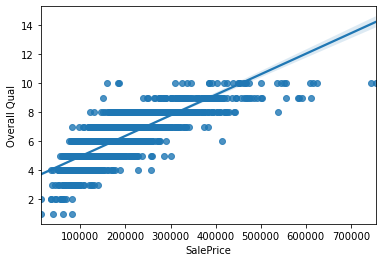

In [276]:
#For x="SalePrice", y="Overall Qual"
sns.regplot(original_df["SalePrice"], original_df["Overall Qual"])

<AxesSubplot:xlabel='SalePrice', ylabel='Year Built'>

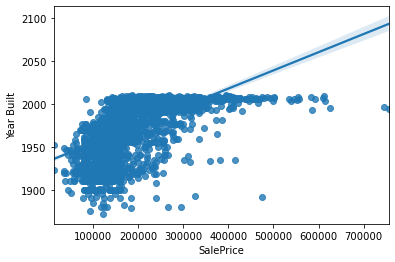

In [277]:
#For x="SalePrice", y="Year Built"
sns.regplot(original_df["SalePrice"], original_df["Year Built"])

<AxesSubplot:xlabel='SalePrice', ylabel='Total Bsmt SF'>

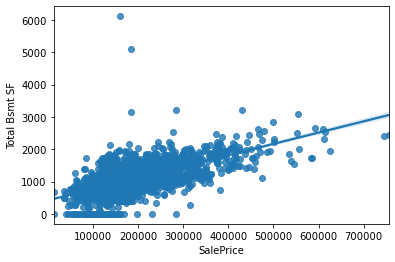

In [278]:
#For x="SalePrice", y="Total Bsmt SF"
sns.regplot(original_df["SalePrice"], original_df["Total Bsmt SF"])

<AxesSubplot:xlabel='SalePrice', ylabel='Gr Liv Area'>

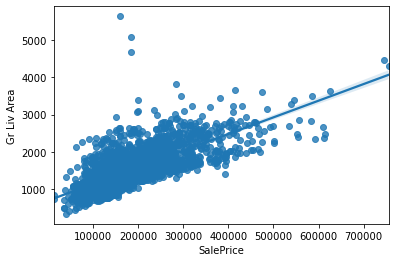

In [279]:
#For x="SalePrice", y="Gr Liv Area"
sns.regplot(original_df["SalePrice"], original_df["Gr Liv Area"])

<AxesSubplot:xlabel='SalePrice', ylabel='Garage Area'>

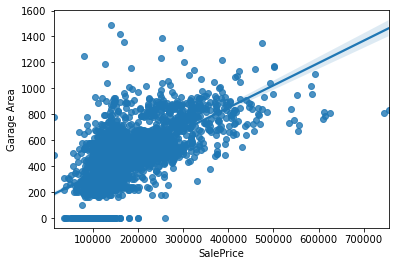

In [280]:
#For x="SalePrice", y="Garage Area"
sns.regplot(original_df["SalePrice"], original_df["Garage Area"])

Based on these scatterplots and their corresponding lines of regression, I can confirm that my expectation is correct. Generally, I would say that for each of the top features, the sale price will increase as the corresponding feature value increases. If you look at the line of linear regression for each sale price against each feature, there is a positive correlation (positive slope), which implies that as each of the features increase, so does the sale price.